In [1]:
%matplotlib inline
from nuscenes import NuScenes
dataroot='/run/user/1001/gvfs/smb-share:server=sesl-cloud.local,share=hais-project/dataset/nuScenes'
dataroot='/media/abdo2020/DATA1/Datasets/images-dataset/raw-data/NuScience/nuScenes'
nusc = NuScenes(version='v1.0-mini', dataroot=dataroot, verbose=True)


Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 1.598 seconds.
Reverse indexing ...
Done reverse indexing in 0.4 seconds.


## display annotation

{'token': 'e3d495d4ac534d54b321f50006683844', 'sample_token': 'ca9a282c9e77460f8360f564131a8af5', 'ego_pose_token': 'e3d495d4ac534d54b321f50006683844', 'calibrated_sensor_token': '1d31c729b073425e8e0202c5c6e66ee1', 'timestamp': 1532402927612460, 'fileformat': 'jpg', 'is_key_frame': True, 'height': 900, 'width': 1600, 'filename': 'samples/CAM_FRONT/n015-2018-07-24-11-22-45+0800__CAM_FRONT__1532402927612460.jpg', 'prev': '', 'next': '68e8e98cf7b0487baa139df808641db7', 'sensor_modality': 'camera', 'channel': 'CAM_FRONT'}


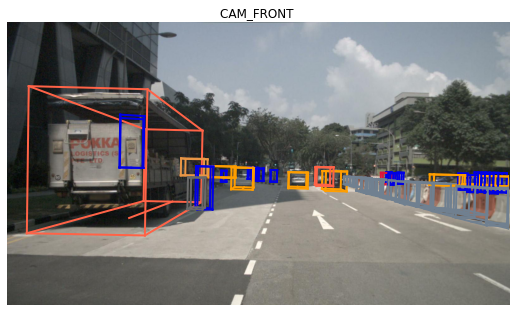

In [3]:
# Show the annotations + add the inspection lables : safety index
sensor = 'CAM_FRONT'
cam_front_data = nusc.get('sample_data', nusc.sample[0]['data'][sensor])
print(cam_front_data)
# print(nusc.get('sample',cam_front_data['sample_token']))
nusc.render_sample_data(cam_front_data['token']) 

In [28]:
cam_front_data['token']

'e3d495d4ac534d54b321f50006683844'

label: nan, score: nan, xyz: [-5.88, -0.06, 58.96], wlh: [0.65, 0.71, 1.61], rot axis: [-0.98, 0.14, -0.16], ang(degrees): -92.38, ang(rad): -1.61, vel: nan, nan, nan, name: human.pedestrian.adult, token: e4a3582721c34f528e3367f0bda9485d


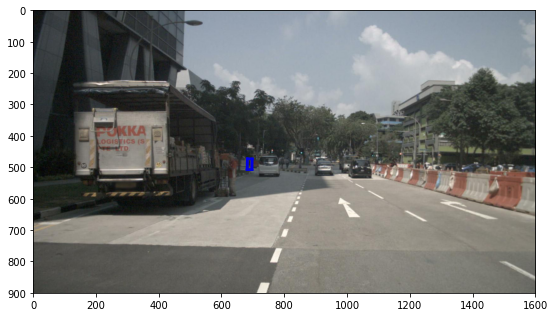

In [27]:

def plot_boxes(nusc, sample_data_token):
	import matplotlib.pyplot as plt
	import numpy as np
	from PIL import Image

	# Load boxes and image.
	data_path, boxes, camera_intrinsic = nusc.get_sample_data(sample_data_token)
	data = Image.open(data_path)

	# Init axes.
	_, ax = plt.subplots(1, 1, figsize=(9, 16))

	# Show image.
	ax.imshow(data)

	# Show boxes.
	for kk, box in enumerate(boxes):
		if kk==5:
			c = np.array(nusc.explorer.get_color(box.name)) / 255.0
			box.render(ax, view=camera_intrinsic, normalize=True, colors=(c, c, c))
			print(box)
			break

	# Limit visible range.
	ax.set_xlim(0, data.size[0])
	ax.set_ylim(data.size[1], 0)

# plot exmple
sensor = 'CAM_FRONT'
cam_front_data = nusc.get('sample_data', nusc.sample[0]['data'][sensor])
plot_boxes(nusc, cam_front_data['token'])



 - sample= ca9a282c9e77460f8360f564131a8af5,
 - scene= cc8c0bf57f984915a77078b10eb33198,  	      
 - Annotations: 
83d881a6b3d94ef3a3bc3b585cc514f8

 flag: boxes=[label: nan, score: nan, xyz: [409.99, 1164.10, 1.62], wlh: [2.88, 10.20, 3.60], rot axis: [0.00, 0.00, 1.00], ang(degrees): -108.69, ang(rad): -1.90, vel: nan, nan, nan, name: vehicle.truck, token: 83d881a6b3d94ef3a3bc3b585cc514f8]

 flag: boxes=[label: nan, score: nan, xyz: [409.99, 1164.10, 1.62], wlh: [2.88, 10.20, 3.60], rot axis: [0.00, 0.00, 1.00], ang(degrees): -108.69, ang(rad): -1.90, vel: nan, nan, nan, name: vehicle.truck, token: 83d881a6b3d94ef3a3bc3b585cc514f8]

 flag: boxes=[label: nan, score: nan, xyz: [409.99, 1164.10, 1.62], wlh: [2.88, 10.20, 3.60], rot axis: [0.00, 0.00, 1.00], ang(degrees): -108.69, ang(rad): -1.90, vel: nan, nan, nan, name: vehicle.truck, token: 83d881a6b3d94ef3a3bc3b585cc514f8]


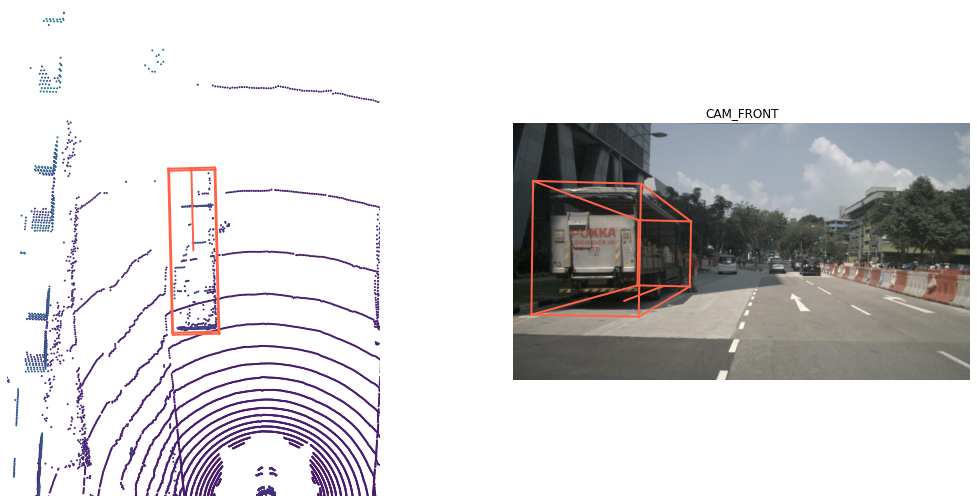

In [13]:
# show lidar + image annatation
sample = nusc.sample[0]
my_annotation_token =  sample['anns'][18]#"70aecbe9b64f4722ab3c230391a3beb8"
print(f'\n - sample= {sample["token"]},\n - scene= {sample["scene_token"]},  \
	      \n - Annotations: \n{my_annotation_token}')
my_annotation_metadata =  nusc.get('sample_annotation', my_annotation_token)
nusc.render_annotation(my_annotation_token)


Adding ego poses to map...


100%|██████████| 1/1 [00:04<00:00,  4.71s/it]


Creating plot...


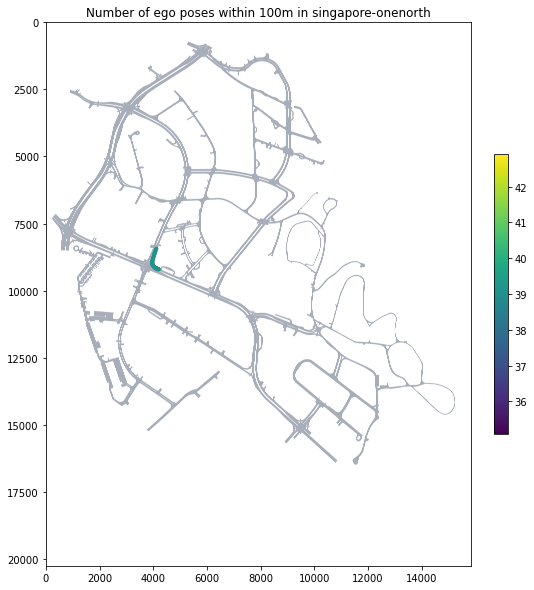

In [18]:
#  show the map
nusc.render_egoposes_on_map(log_location='singapore-onenorth')